In [22]:
#імпорт бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error

# Вміст таблиць:
**key.csv:**
```
station_nbr - id метеостанції
store_nbr - id магазину
```

**sampleSubmission.csv:**
```
id - <store_nbr>_<item_nbr>_<date>
units - кількість проданих item
```

**train.csv & test.csv:**
```
date - дата
store_nbr - id магазину
item_nbr - id товару
units - кількість продаж
```

**weather.csv (Колонки, які використовуються у аналізі):**
```
station_nbr - id магазину
date - дата
codesum - перелік текстових значень погодних явищ (RA - дощ, SN - сніг)
preciototal - розмір осаду
```


In [23]:
# Завантаження даних з файлу
# key.csv містить інформацію, яка метеостанція (station_nbr) відповідає за прогноз у магазині (store_nbr)
key_data=pd.read_csv('key.csv')
print(key_data)

    store_nbr  station_nbr
0           1            1
1           2           14
2           3            7
3           4            9
4           5           12
5           6           14
6           7            6
7           8            4
8           9           17
9          10           12
10         11           10
11         12           11
12         13            6
13         14           16
14         15           13
15         16            2
16         17           20
17         18           17
18         19           15
19         20            7
20         21            3
21         22           10
22         23           17
23         24            9
24         25           13
25         26           17
26         27           10
27         28            7
28         29            3
29         30           19
30         31           17
31         32           13
32         33            3
33         34           17
34         35            5
35         36           18
3

In [24]:
#загальна інформація
key_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   store_nbr    45 non-null     int64
 1   station_nbr  45 non-null     int64
dtypes: int64(2)
memory usage: 848.0 bytes


In [25]:
# Завантаження даних з файлу
# sampleSubmission.csv містить приклад того, як повинен виглядати результат (замість 0 в units - результат)
# id - <store_nbr>_<item_nbr>_<date>
# units - кількість проданих item
sample_submission_data=pd.read_csv('sampleSubmission.csv')
sample_submission_data

,id,units
0,2_1_2013-04-01,0
1,2_2_2013-04-01,0
2,2_3_2013-04-01,0
3,2_4_2013-04-01,0
4,2_5_2013-04-01,0
...,...,...
526912,45_107_2014-10-26,0
526913,45_108_2014-10-26,0
526914,45_109_2014-10-26,0
526915,45_110_2014-10-26,0


In [26]:
#загальна інформація
sample_submission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526917 entries, 0 to 526916
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      526917 non-null  object
 1   units   526917 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.0+ MB


In [27]:
#завантаження даних з файлу
train_data_full=pd.read_csv('train.csv')
# Вирахування кількості рядків для тестового набору даних (30%)
train_size = int(0.3 * len(train_data_full))
# Видалення останніх 30% даних з оригінального набору даних
# dataframe.head(N) - повернути N перших записів. У даному випадку перших 70%.
# Результат використовуються як аргумент для створення класу DataFrame, тому що без цієї дії на подальших етапах виникає помилка
train_data = pd.DataFrame(train_data_full.head(len(train_data_full) - train_size))
train_data

,date,store_nbr,item_nbr,units
0,2012-01-01,1,1,0
1,2012-01-01,1,2,0
2,2012-01-01,1,3,0
3,2012-01-01,1,4,0
4,2012-01-01,1,5,0
...,...,...,...,...
3232315,2013-12-01,41,107,0
3232316,2013-12-01,41,108,5
3232317,2013-12-01,41,109,0
3232318,2013-12-01,41,110,0


In [28]:
#загальна інформація
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232320 entries, 0 to 3232319
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   date       object
 1   store_nbr  int64 
 2   item_nbr   int64 
 3   units      int64 
dtypes: int64(3), object(1)
memory usage: 98.6+ MB


In [29]:
# Відокремлення останніх 30% даних у зміну test_df
# dataframe.tail(N) - повернути N останніх записів датафрейму
# Результат використовуються як аргумент для створення класу DataFrame, тому що без цієї дії на подальших етапах виникає помилка
test_data=pd.DataFrame(train_data_full.tail(train_size))
# Завантаження даних в файл
test_data.to_csv('test.csv', index=False)

In [30]:
test_data

,date,store_nbr,item_nbr,units
3232320,2013-12-01,42,1,0
3232321,2013-12-01,42,2,0
3232322,2013-12-01,42,3,0
3232323,2013-12-01,42,4,0
3232324,2013-12-01,42,5,55
...,...,...,...,...
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0


Тепер у нас є набір тренувальних даних train_data, у якого 3.2 млн. записів та тестувальний набір з 1.3 млн. записів

In [31]:
#загальна інформація
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385280 entries, 3232320 to 4617599
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   date       1385280 non-null  object
 1   store_nbr  1385280 non-null  int64 
 2   item_nbr   1385280 non-null  int64 
 3   units      1385280 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 42.3+ MB


In [32]:
#завантаження даних з файлу
weather_data=pd.read_csv('weather.csv')
weather_data

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2012-01-01,52,31,42,M,36,40,23,0,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
1,2,2012-01-01,48,33,41,16,37,39,24,0,0716,1626,RA,0.0,0.07,28.82,29.91,9.1,23,11.3
2,3,2012-01-01,55,34,45,9,24,36,20,0,0735,1720,,0.0,0.00,29.77,30.47,9.9,31,10.0
3,4,2012-01-01,63,47,55,4,28,43,10,0,0728,1742,,0.0,0.00,29.79,30.48,8.0,35,8.2
4,6,2012-01-01,63,34,49,0,31,43,16,0,0727,1742,,0.0,0.00,29.95,30.47,14.0,36,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20512,16,2014-10-31,53,34,44,M,35,41,21,0,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
20513,17,2014-10-31,59,34,47,M,32,41,18,0,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9


In [33]:
#загальна інформація
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20517 entries, 0 to 20516
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   station_nbr  20517 non-null  int64 
 1   date         20517 non-null  object
 2   tmax         20517 non-null  object
 3   tmin         20517 non-null  object
 4   tavg         20517 non-null  object
 5   depart       20517 non-null  object
 6   dewpoint     20517 non-null  object
 7   wetbulb      20517 non-null  object
 8   heat         20517 non-null  object
 9   cool         20517 non-null  object
 10  sunrise      20517 non-null  object
 11  sunset       20517 non-null  object
 12  codesum      20517 non-null  object
 13  snowfall     20517 non-null  object
 14  preciptotal  20517 non-null  object
 15  stnpressure  20517 non-null  object
 16  sealevel     20517 non-null  object
 17  resultspeed  20517 non-null  object
 18  resultdir    20517 non-null  object
 19  avgspeed     20517 non-nu

In [34]:
# переведення даних в чило крім date та codesum
# Якщо перебирати DataFrame циклом, то будуть перебиратись його колонки.
# Якщо назва колонки не 'date' і не 'codesum' то всі значення перетворюються у число
for i in weather_data:
    if (i!='date' and i!='codesum'):
        weather_data[i] = pd.to_numeric(weather_data[i], errors='coerce')

In [35]:
# Обробка дати
# Перетворення значень колонки 'date' у всих DataFrame з str типу у тип Datetime (базовий тип роботи з датою у пайтоні)
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])
weather_data['date'] = pd.to_datetime(weather_data['date'])

In [36]:
# перевіряєм тип даних
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20517 entries, 0 to 20516
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station_nbr  20517 non-null  int64         
 1   date         20517 non-null  datetime64[ns]
 2   tmax         19611 non-null  float64       
 3   tmin         19609 non-null  float64       
 4   tavg         19048 non-null  float64       
 5   depart       9006 non-null   float64       
 6   dewpoint     19851 non-null  float64       
 7   wetbulb      19265 non-null  float64       
 8   heat         19048 non-null  float64       
 9   cool         19048 non-null  float64       
 10  sunrise      10861 non-null  float64       
 11  sunset       10861 non-null  float64       
 12  codesum      20517 non-null  object        
 13  snowfall     12982 non-null  float64       
 14  preciptotal  17247 non-null  float64       
 15  stnpressure  19588 non-null  float64       
 16  seal

In [37]:
#статистичні характеристики числових стовпців
# Із документації pandas.describe():
# Описова статистика включає статистику, яка підсумовує центральну тенденцію, дисперсію та форму розподілу набору даних, за винятком NaNзначень.
#
# Список рядків:
# DataFrame.count
# Count number of non-NA/null observations.
#
# DataFrame.max
# Maximum of the values in the object.
#
# DataFrame.min
# Minimum of the values in the object.
#
# DataFrame.mean
# Mean of the values.
#
# DataFrame.std
# Standard deviation of the observations.
#
# DataFrame.select_dtypes
# Subset of a DataFrame including/excluding columns based on their dtype.
#
# По факту, корисної інформації в даному випадку ми не отримуємо, просто статистичні дані
weather_data.describe()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
count,20517.000000,20517,19611.000000,19609.000000,19048.000000,9006.000000,19851.000000,19265.000000,19048.000000,19048.000000,10861.000000,10861.000000,12982.000000,17247.000000,19588.000000,18793.000000,19928.000000,19928.000000,19642.000000
mean,10.549057,2013-06-04 03:44:39.865477376,71.621131,50.654546,61.240130,1.363091,47.270918,53.888243,9.704536,5.944666,585.038578,1823.387073,0.044908,0.114701,29.162770,30.009160,6.468326,18.729928,7.914077
min,1.000000,2012-01-01 00:00:00,-11.000000,-21.000000,-16.000000,-35.000000,-24.000000,-15.000000,0.000000,0.000000,406.000000,1611.000000,0.000000,0.000000,23.720000,29.160000,0.000000,1.000000,0.000000
25%,6.000000,2012-09-21 00:00:00,59.000000,37.000000,48.000000,-3.000000,33.000000,42.000000,0.000000,0.000000,527.000000,1745.000000,0.000000,0.000000,29.110000,29.890000,3.200000,13.000000,5.100000
50%,11.000000,2013-06-04 00:00:00,76.000000,53.000000,65.000000,2.000000,51.000000,57.000000,0.000000,0.000000,602.000000,1833.000000,0.000000,0.000000,29.410000,30.000000,5.700000,18.000000,7.300000
75%,16.000000,2014-02-17 00:00:00,87.000000,67.000000,77.000000,6.000000,64.000000,68.000000,17.000000,12.000000,646.000000,1915.000000,0.000000,0.020000,29.780000,30.130000,8.900000,26.000000,10.100000
max,20.000000,2014-10-31 00:00:00,114.000000,88.000000,100.000000,33.000000,77.000000,80.000000,81.000000,35.000000,740.000000,1949.000000,16.200000,7.360000,30.610000,30.800000,28.400000,36.000000,28.700000
std,5.768533,NaN,19.847451,19.139055,19.194357,7.646759,19.400495,17.017772,13.843873,7.834796,90.916758,92.148402,0.505575,0.364776,1.245414,0.191134,4.192577,9.675662,3.933458


In [38]:
# обираємо потрібні стовпці для аналізу
# Обрізка всих інших колонок, які не входять у список
new_weather_data = weather_data.loc[:, ['station_nbr', 'date', 'codesum', 'preciptotal']]
new_weather_data

,station_nbr,date,codesum,preciptotal
0,1,2012-01-01,RA FZFG BR,0.05
1,2,2012-01-01,RA,0.07
2,3,2012-01-01,,0.00
3,4,2012-01-01,,0.00
4,6,2012-01-01,,0.00
...,...,...,...,...
20512,16,2014-10-31,,0.00
20513,17,2014-10-31,RA,0.00
20514,18,2014-10-31,,0.00
20515,19,2014-10-31,RA SN,0.02


In [39]:
# Об'єднання даних для побудови моделі
# З'єднуємо train_data з key_data через стовпці store_nbr
# pd.merge(df1, df2, on="") - об'єднати два DataFrame по колонці on
# В результаті, у train_data та test_data добавилась колонка station_nbr (id метеостанції)
train_merged = pd.merge(train_data, key_data, on='store_nbr')
test_merged = pd.merge(test_data, key_data, on='store_nbr')

In [40]:
train_merged

,date,store_nbr,item_nbr,units,station_nbr
0,2012-01-01,1,1,0,1
1,2012-01-01,1,2,0,1
2,2012-01-01,1,3,0,1
3,2012-01-01,1,4,0,1
4,2012-01-01,1,5,0,1
...,...,...,...,...,...
3232315,2013-12-01,35,107,0,5
3232316,2013-12-01,35,108,0,5
3232317,2013-12-01,35,109,0,5
3232318,2013-12-01,35,110,0,5


In [41]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232320 entries, 0 to 3232319
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   item_nbr     int64         
 3   units        int64         
 4   station_nbr  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 123.3 MB


In [42]:
# Об'єднання з new_weather_data для отримання погодніх умов за датою та станцією
# За допомогою попереднього об'єднання, тепер можна об'єднати weather дату з датами продаж
# Тепер цього разу за спільні дані беруться поля station_nbr та date
# Тобто, до кожного запису про продажу добавляються дані про прогоду на цю дату
train_weather = pd.merge(train_merged, new_weather_data, on=['station_nbr', 'date'])
test_weather = pd.merge(test_merged, new_weather_data, on=['station_nbr', 'date'])

In [43]:
train_weather

,date,store_nbr,item_nbr,units,station_nbr,codesum,preciptotal
0,2012-01-01,1,1,0,1,RA FZFG BR,0.05
1,2012-01-01,1,2,0,1,RA FZFG BR,0.05
2,2012-01-01,1,3,0,1,RA FZFG BR,0.05
3,2012-01-01,1,4,0,1,RA FZFG BR,0.05
4,2012-01-01,1,5,0,1,RA FZFG BR,0.05
...,...,...,...,...,...,...,...
3232315,2013-12-01,35,107,0,5,,NaN
3232316,2013-12-01,35,108,0,5,,NaN
3232317,2013-12-01,35,109,0,5,,NaN
3232318,2013-12-01,35,110,0,5,,NaN


Вибір наступних 3 днів для кожного товару та обєднання в один файл

In [44]:
# ВИКОНАННЯ КОМІРКИ ЗАЙМАЄ ВЕЛИКИЙ ЧАС

TRAIN_EXISTING_DF_COMBINED = pd.DataFrame({'date': [], 'store_nbr': [], 'item_nbr':[],'units': [], 'station_nbr': [], 'codesum':[], 'preciptotal':[]})
TEST_EXISTING_DF_COMBINED= pd.DataFrame({'date': [], 'store_nbr': [], 'item_nbr':[],'units': [], 'station_nbr': [], 'codesum':[], 'preciptotal':[]})

for k in range(1, 112):
    # Ітерація по кожному Item ID (1-111)
    print(k)
    # фільтрація записів з Item ID
    train_selected_data = train_weather[train_weather['item_nbr'] == k]
    test_selected_data = test_weather[test_weather['item_nbr'] == k]

    # фільтрація даних по ознакам: Якщо в цю дату був дощ (RA) та значеня осадків був > 1, або якщо був сніг (SN) та осади були > 2
    train_poor_weather = train_selected_data[((train_selected_data['codesum'].str.contains('RA')) & (train_selected_data['preciptotal'] > 1)) | ((train_selected_data['codesum'].str.contains('SN')) & (train_selected_data['preciptotal'] > 2))]
    test_poor_weather = test_selected_data[((test_selected_data['codesum'].str.contains('RA')) & (test_selected_data['preciptotal'] > 1)) | ((test_selected_data['codesum'].str.contains('SN')) & (test_selected_data['preciptotal'] > 2))]

    # Сортування по даті та по id магазину
    train_poor_weather=train_poor_weather.sort_values(by=['date', 'store_nbr'])
    test_poor_weather=test_poor_weather.sort_values(by=['date', 'store_nbr'])

    # Для кожного запису train/test_poor_weather отримати записи на 3 дні вперед
    train_existing_df = pd.DataFrame({'date': [], 'store_nbr': [], 'item_nbr':[],'units': [], 'station_nbr': [], 'codesum':[], 'preciptotal':[]})
    for i in range(len(train_poor_weather)):
        # train_poor_weather - дані з катаклізмами
        # 03-03-2012 SN
        # 05-04-2012 SN

        # train_selected_data
        # 03-03-2012 SN 5
        # 04-03-2012    4
        # 05-03-2012    3
        # 06-03-2012


        # Отримати запис, date якого дорівнює date i-ого запису train_poor_weather + 1 день та store id якого дорівнює store id i-ого елемента
        train_d1=train_selected_data[(train_selected_data['date'] == train_poor_weather['date'].iloc[i] + pd.DateOffset(days=1)) & (train_selected_data['store_nbr'] == train_poor_weather['store_nbr'].iloc[i])]
        train_existing_df= pd.concat([train_existing_df, train_d1], ignore_index=True)

        # Отримати запис, date якого дорівнює date i-ого запису train_poor_weather + 2 дня та store id якого дорівнює store id i-ого елемента
        train_d2=train_selected_data[(train_selected_data['date'] == train_poor_weather['date'].iloc[i] + pd.DateOffset(days=2)) & (train_selected_data['store_nbr'] == train_poor_weather['store_nbr'].iloc[i])]
        train_existing_df = pd.concat([train_existing_df, train_d2], ignore_index=True)

        # Отримати запис, date якого дорівнює date i-ого запису train_poor_weather + 3 дня та store id якого дорівнює store id i-ого елемента
        train_d3=train_selected_data[(train_selected_data['date'] == train_poor_weather['date'].iloc[i] + pd.DateOffset(days=3)) & (train_selected_data['store_nbr'] == train_poor_weather['store_nbr'].iloc[i])]
        train_existing_df = pd.concat([train_existing_df, train_d3], ignore_index=True)
        
    test_existing_df = pd.DataFrame({'date': [], 'store_nbr': [], 'item_nbr':[],'units': [], 'station_nbr': [], 'codesum':[], 'preciptotal':[]})

    for i in range(len(test_poor_weather)):
        test_d1=test_selected_data[(test_selected_data['date'] == test_poor_weather['date'].iloc[i] + pd.DateOffset(days=1)) & (test_selected_data['store_nbr'] == test_poor_weather['store_nbr'].iloc[i])]
        test_existing_df= pd.concat([test_existing_df, test_d1], ignore_index=True)

        test_d2=test_selected_data[(test_selected_data['date'] == test_poor_weather['date'].iloc[i] + pd.DateOffset(days=2)) & (test_selected_data['store_nbr'] == test_poor_weather['store_nbr'].iloc[i])]
        test_existing_df = pd.concat([test_existing_df, test_d2], ignore_index=True)

        test_d3=test_selected_data[(test_selected_data['date'] == test_poor_weather['date'].iloc[i] + pd.DateOffset(days=3)) & (test_selected_data['store_nbr'] == test_poor_weather['store_nbr'].iloc[i])]
        test_existing_df = pd.concat([test_existing_df, test_d3], ignore_index=True)
        
    train_existing_df = train_existing_df.drop_duplicates()
    test_existing_df = test_existing_df.drop_duplicates()

    # Переписати всі NaN значення в колонкі preciptotal на 0.00
    train_existing_df.iloc[:, train_existing_df.columns.get_loc('preciptotal')].fillna(0.00, inplace=True)
    test_existing_df.iloc[:, test_existing_df.columns.get_loc('preciptotal')].fillna(0.00, inplace=True)

    # Добавити результат до головного DataFrame
    TRAIN_EXISTING_DF_COMBINED = pd.concat([TRAIN_EXISTING_DF_COMBINED, train_existing_df], ignore_index=True)
    TEST_EXISTING_DF_COMBINED = pd.concat([TEST_EXISTING_DF_COMBINED, test_existing_df], ignore_index=True)

1


C:\Users\Andrew\AppData\Local\Temp\ipykernel_2540\1923980477.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_existing_df= pd.concat([train_existing_df, train_d1], ignore_index=True)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_2540\1923980477.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_existing_df= pd.concat([test_existing_df, test_d1], ignore_index=True)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_2540\1923980477.py:67: FutureWarning: The behavior of DataFrame concaten

2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

In [ ]:
TRAIN_EXISTING_DF_COMBINED

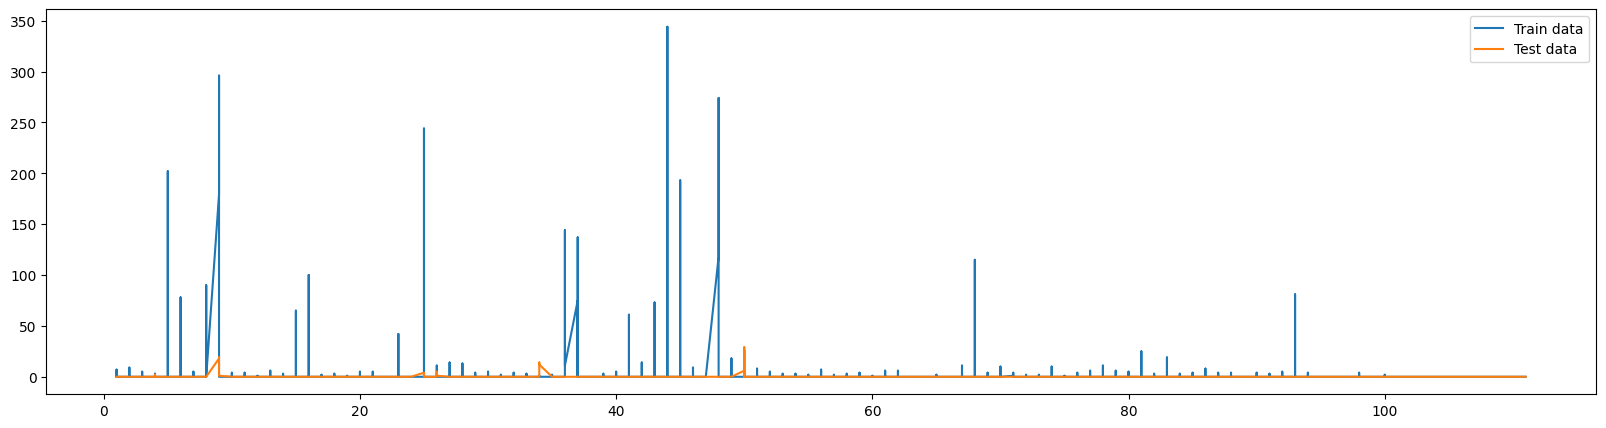

In [56]:
plt.figure(figsize=(20, 5))
plt.plot(TRAIN_EXISTING_DF_COMBINED['item_nbr'], TRAIN_EXISTING_DF_COMBINED['units'], label = 'Train data')
plt.plot(TEST_EXISTING_DF_COMBINED['item_nbr'], TEST_EXISTING_DF_COMBINED['units'], label = 'Test data')
plt.legend()
plt.show()

ВИБІР НОМЕРА ПРОДУКТУ ВІД 1 ДО 111

In [73]:
number_produkt=72
train_selected_data = train_weather[train_weather['item_nbr'] == number_produkt]
test_selected_data = test_weather[test_weather['item_nbr'] == number_produkt]

train_selected_data

,date,store_nbr,item_nbr,units,station_nbr,codesum,preciptotal
71,2012-01-01,1,72,0,1,RA FZFG BR,0.05
182,2012-01-02,1,72,0,1,,0.01
293,2012-01-03,1,72,0,1,,0.00
404,2012-01-04,1,72,0,1,,0.00
515,2012-01-05,1,72,0,1,,0.00
...,...,...,...,...,...,...,...
3231836,2013-11-27,35,72,0,5,,NaN
3231947,2013-11-28,35,72,0,5,,NaN
3232058,2013-11-29,35,72,0,5,,NaN
3232169,2013-11-30,35,72,0,5,,NaN


In [75]:
# якщо в рядку codesum є значення дощу (RA) і в рядку preciptotal значення більше 1 
# або в рядку codesum є значення снігу (SN) і в рядку preciptotal значення більше 2
train_poor_weather = train_selected_data[((train_selected_data['codesum'].str.contains('RA')) & (train_selected_data['preciptotal'] > 1)) | ((train_selected_data['codesum'].str.contains('SN')) & (train_selected_data['preciptotal'] > 2))]
train_poor_weather=train_poor_weather.sort_values(by=['date', 'store_nbr'])

test_poor_weather = test_selected_data[((test_selected_data['codesum'].str.contains('RA')) & (test_selected_data['preciptotal'] > 1)) | ((test_selected_data['codesum'].str.contains('SN')) & (test_selected_data['preciptotal'] > 2))]
test_poor_weather=test_poor_weather.sort_values(by=['date', 'store_nbr'])

train_poor_weather

,date,store_nbr,item_nbr,units,station_nbr,codesum,preciptotal
2594030,2012-01-09,17,72,0,20,RA BR VCTS,1.58
3026708,2012-01-09,36,72,0,18,TSRA RA BR,1.32
2521991,2012-01-12,16,72,0,2,RA SN FG+ FG FZFG BR UP,1.06
81767,2012-01-24,2,72,0,14,RA BR,1.52
81878,2012-01-24,6,72,0,14,RA BR,1.52
...,...,...,...,...,...,...,...
896951,2013-03-23,41,72,0,12,TSRA RA BR VCTS,2.03
1948121,2013-03-23,43,72,0,11,TSRA RA BR,2.31
897062,2013-03-23,44,72,0,12,TSRA RA BR VCTS,2.03
3076103,2013-03-30,36,72,0,18,TSRA BR,1.04


In [76]:
# вибіраємо наступні 3 дні після снігу чи дощу
train_existing_df = pd.DataFrame({'date': [], 'store_nbr': [], 'item_nbr':[],'units': [], 'station_nbr': [], 'codesum':[], 'preciptotal':[]})

for i in range(len(train_poor_weather)):
    print(i)
    train_d1=train_selected_data[(train_selected_data['date'] == train_poor_weather['date'].iloc[i] + pd.DateOffset(days=1)) & (train_selected_data['store_nbr'] == train_poor_weather['store_nbr'].iloc[i])]
    train_existing_df= pd.concat([train_existing_df, train_d1], ignore_index=True)

    train_d2=train_selected_data[(train_selected_data['date'] == train_poor_weather['date'].iloc[i] + pd.DateOffset(days=2)) & (train_selected_data['store_nbr'] == train_poor_weather['store_nbr'].iloc[i])]
    train_existing_df = pd.concat([train_existing_df, train_d2], ignore_index=True)

    train_d3=train_selected_data[(train_selected_data['date'] == train_poor_weather['date'].iloc[i] + pd.DateOffset(days=3)) & (train_selected_data['store_nbr'] == train_poor_weather['store_nbr'].iloc[i])]
    train_existing_df = pd.concat([train_existing_df, train_d3], ignore_index=True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58


C:\Users\Andrew\AppData\Local\Temp\ipykernel_2540\992166337.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  train_existing_df= pd.concat([train_existing_df, train_d1], ignore_index=True)


59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
3

In [77]:
# вибіраємо наступні 3 дні після снігу чи дощу
test_existing_df = pd.DataFrame({'date': [], 'store_nbr': [], 'item_nbr':[],'units': [], 'station_nbr': [], 'codesum':[], 'preciptotal':[]})

for i in range(len(test_poor_weather)):
    print(i)
    test_d1=test_selected_data[(test_selected_data['date'] == test_poor_weather['date'].iloc[i] + pd.DateOffset(days=1)) & (test_selected_data['store_nbr'] == test_poor_weather['store_nbr'].iloc[i])]
    test_existing_df= pd.concat([test_existing_df, test_d1], ignore_index=True)

    test_d2=test_selected_data[(test_selected_data['date'] == test_poor_weather['date'].iloc[i] + pd.DateOffset(days=2)) & (test_selected_data['store_nbr'] == test_poor_weather['store_nbr'].iloc[i])]
    test_existing_df = pd.concat([test_existing_df, test_d2], ignore_index=True)

    test_d3=test_selected_data[(test_selected_data['date'] == test_poor_weather['date'].iloc[i] + pd.DateOffset(days=3)) & (test_selected_data['store_nbr'] == test_poor_weather['store_nbr'].iloc[i])]
    test_existing_df = pd.concat([test_existing_df, test_d3], ignore_index=True)

0
1
2
3


C:\Users\Andrew\AppData\Local\Temp\ipykernel_2540\1926072390.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_existing_df= pd.concat([test_existing_df, test_d1], ignore_index=True)


In [78]:
# видаляєм однакові дані
train_existing_df = train_existing_df.drop_duplicates()

test_existing_df = test_existing_df.drop_duplicates()

test_existing_df

,date,store_nbr,item_nbr,units,station_nbr,codesum,preciptotal
0,2014-02-14,14.0,72.0,0.0,16.0,RA SN BR,0.28
1,2014-02-15,14.0,72.0,0.0,16.0,SN BR,0.15
2,2014-02-16,14.0,72.0,0.0,16.0,SN BR UP,NaN
3,2014-02-14,45.0,72.0,0.0,16.0,RA SN BR,0.28
4,2014-02-15,45.0,72.0,0.0,16.0,SN BR,0.15
5,2014-02-16,45.0,72.0,0.0,16.0,SN BR UP,NaN


In [79]:
# заміна NaN значень
train_existing_df.iloc[:, train_existing_df.columns.get_loc('preciptotal')].fillna(0.00, inplace=True)

test_existing_df.iloc[:, test_existing_df.columns.get_loc('preciptotal')].fillna(0.00, inplace=True)

test_existing_df

,date,store_nbr,item_nbr,units,station_nbr,codesum,preciptotal
0,2014-02-14,14.0,72.0,0.0,16.0,RA SN BR,0.28
1,2014-02-15,14.0,72.0,0.0,16.0,SN BR,0.15
2,2014-02-16,14.0,72.0,0.0,16.0,SN BR UP,0.00
3,2014-02-14,45.0,72.0,0.0,16.0,RA SN BR,0.28
4,2014-02-15,45.0,72.0,0.0,16.0,SN BR,0.15
5,2014-02-16,45.0,72.0,0.0,16.0,SN BR UP,0.00


In [80]:
# Обчислюємо суму стовпця "units"
train_total_units = train_existing_df['units'].sum()
print("Загальна сума train_units:", train_total_units)

test_total_units = test_existing_df['units'].sum()
print("Загальна сума test_units:", test_total_units)

Загальна сума train_units: 14.0
Загальна сума test_units: 0.0


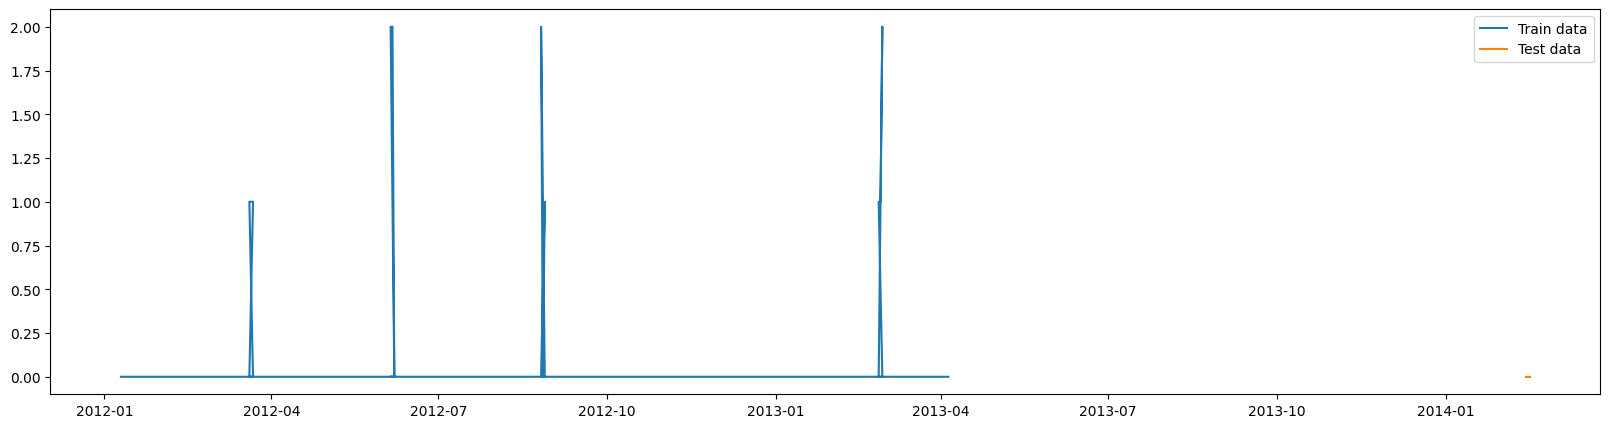

In [81]:
plt.figure(figsize=(20, 5))
plt.plot(train_existing_df['date'], train_existing_df['units'], label = 'Train data')
plt.plot(test_existing_df['date'], test_existing_df['units'], label = 'Test data')
plt.legend()
plt.show()

In [82]:
# Створюємо нову ознаку - день у році
train_existing_df['date'] = pd.to_datetime(train_existing_df['date'])
test_existing_df['date'] = pd.to_datetime(test_existing_df['date'])

train_existing_df['dayofyear'] = train_existing_df['date'].dt.dayofyear
test_existing_df['dayofyear'] = test_existing_df['date'].dt.dayofyear

# dayofyear | units
# 1 | 0
# 2 | 0

x_train = pd.DataFrame()
x_train['dayofyear'] = train_existing_df['dayofyear']
x_test = pd.DataFrame()
x_test['dayofyear'] = test_existing_df['dayofyear']

y_train = train_existing_df['units']
y_test = test_existing_df['units']

x_train

,dayofyear
0,10
1,11
2,12
3,10
4,11
...,...
1286,85
1287,90
1288,93
1289,94


In [83]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [84]:
# Прогноз для тренувальних даних
pred_train = model.predict(x_train)
# Прогноз для даних, які модель ще не бачила
pred_test = model.predict(x_test)

Сума помилок на тренувальних даних = 0.13775725926996832
Сума помилок на тестових даних = 0.018636644287205573


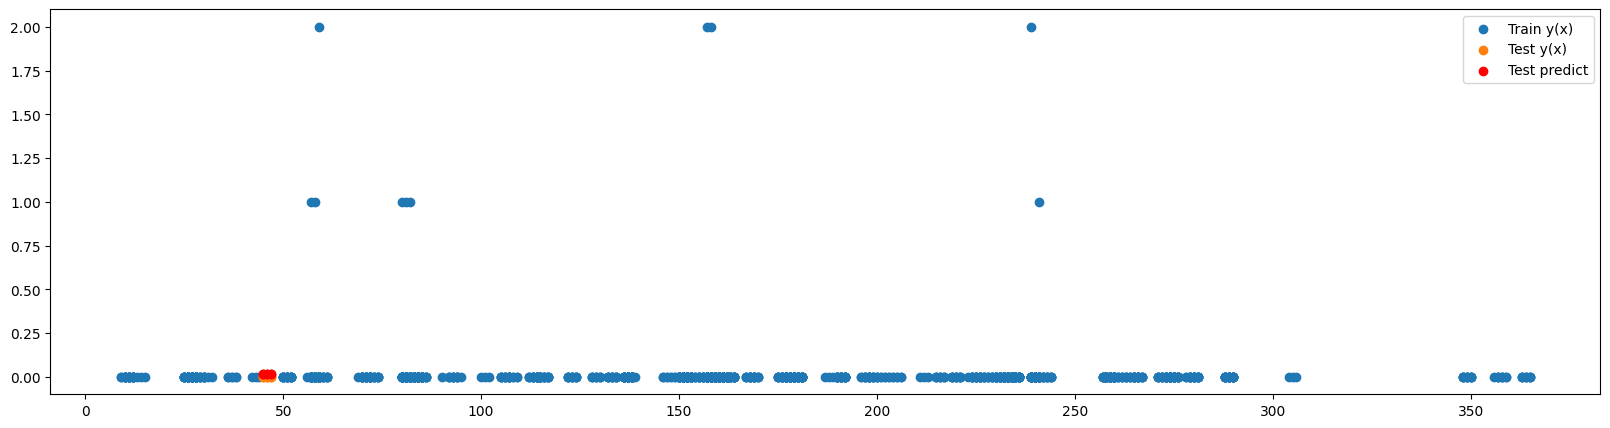

In [85]:
# Перевіряємо якість чисельно
# mean_squared_error - середня сума квадратів відхилень (менше -> краще)
from sklearn.metrics import mean_squared_error

print('Сума помилок на тренувальних даних =', mean_squared_error(y_train, pred_train)**0.5)
print('Сума помилок на тестових даних =', mean_squared_error(y_test, pred_test)**0.5)

plt.figure(figsize=(20, 5))
plt.scatter(x_train['dayofyear'], y_train, label='Train y(x)')
plt.scatter(x_test['dayofyear'], y_test, label='Test y(x)')
plt.scatter(x_test['dayofyear'], pred_test, label='Test predict', color='red')
plt.legend()
plt.show()